<a href="https://colab.research.google.com/github/JoaoMemoria/XPe/blob/MOD1/Trabalho_Pratico_BOOT1MOD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Coletar e inserir o arquivo salario_recebido.csv na plataforma.
2. Analisar os dados coletados.
3. Avaliar a relação entre as variáveis.
4. Criar algoritmo de regressão linear.
5. Responder as questões teóricas e práticas do trabalho.

IMPORTANDO AS BIBLIOTECAS

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

COLETANDO DADOS

In [2]:
salario_recebido = pd.read_csv('/content/drive/MyDrive/#XPe/ANO1/BCP1/MOD1/salario_recebido.csv', sep=';')

ANALISANDO OS DADOS COLETADOS

In [3]:
# VISUALIZANDO ARQUIVOS DA BASE DE DADOS
salario_recebido.head()

,dias_folga,salario_recebido
0,1,4833
1,2,5358
2,3,4500
3,4,4200
4,5,4167


In [4]:
# GERANDO ALGUMAS ESTATISTICAS DA BASE DE DADOS
salario_recebido.describe()

,dias_folga,salario_recebido
count,25.000000,25.000000
mean,14.360000,2767.840000
std,8.783887,1473.826643
min,1.000000,167.000000
25%,7.000000,1600.000000
50%,14.000000,2610.000000
75%,21.000000,3750.000000
max,29.000000,5358.000000


In [5]:
# VERIFICANDO SE EXISTE ALGUM VALOR NULO OU AUSENTE
salario_recebido.isna().sum()

dias_folga          0
salario_recebido    0
dtype: int64

In [6]:
# VERIFICANDO INFORMAÇÕES DA BASE DE DADOS
salario_recebido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   dias_folga        25 non-null     int64
 1   salario_recebido  25 non-null     int64
dtypes: int64(2)
memory usage: 528.0 bytes


ANALISE DE CORRELAÇÃO ENTRE VARIAVEIS


*   Correlação Positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, possuem uma relação direta.
*   Correlação Negativa: as variáveis possuem correlação, mas quando uma cresce a outra decresce, ou seja, possuem uma relação direta.



In [7]:
salario_recebido.corr()

,dias_folga,salario_recebido
dias_folga,1.000000,-0.974192
salario_recebido,-0.974192,1.000000


ANALISE GRAFICA DA CORRELAÇÃO DE VARIAVEIS

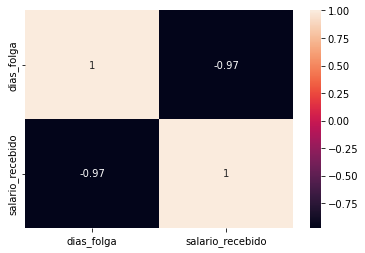

In [8]:
correlacao = salario_recebido.corr()
sns.heatmap(correlacao, annot=True)

## TRATAMENTO DE DADOS

Criando Variável Independente X

In [9]:
X = salario_recebido.iloc[:, 0].values
print(X)

[ 1  2  3  4  5  6  7  8  9 10 11 12 14 16 17 18 19 20 21 22 24 26 27 28
 29]


Criando Variável Dependente Y (O que queremos predizer)

In [10]:
y= salario_recebido.iloc[:,1].values
print(y)

[4833 5358 4500 4200 4167 4555 3750 3667 3662 3333 3167 3603 2600 2333
 2610 2000 1833 1600 1500 2478 1000  667 1280  333  167]


Verificando Tipos de Variáveis

In [11]:
type(X)

numpy.ndarray

In [12]:
type(y)

numpy.ndarray

In [13]:
X.shape

(25,)

Transformando Array em Matriz

In [14]:
X = X.reshape(-1,1)

In [15]:
X.shape

(25, 1)

## CRIANDO MODELO DE MACHINE LEARNING - REGRESSÃO LINEAR

In [16]:
from sklearn.linear_model import LinearRegression
predicao_salario_recebido = LinearRegression()

In [17]:
type (predicao_salario_recebido)

sklearn.linear_model._base.LinearRegression

## REALIZANDO O TREINAMENTO DO MODELO

In [18]:
predicao_salario_recebido.fit(X,y)

LinearRegression()

## CALCULANDO A CONSTANTE ALFA - INTERCEPT

In [19]:
predicao_salario_recebido.intercept_

5115.085821056725

## CALCULANDO O COEFICIENTE ANGULAR DA RETA

In [20]:
predicao_salario_recebido.coef_

array([-163.45722988])

## REALIZANDO AS PREDIÇÕES

In [21]:
previsao_valores = predicao_salario_recebido.predict(X)

## VISUALIZANDO A PREVISAO DE DADOS

In [22]:
# Grafico 1
grafico = px.scatter(x = X.ravel(), y=y)
grafico.show()

In [23]:
# Grafico 2
grafico = px.scatter(x = X.ravel(), y=y)
grafico.add_scatter(x = X.ravel(), y = previsao_valores, name='Previsões')
grafico.show()

## CALCULANDO O VALOR DO SALARIO DE ACORDO COM A EQUAÇÃO LINEAR

In [24]:
# Verificando os valores de uma determinada previsão baseada na quantidade de faltas
alfa = predicao_salario_recebido.intercept_
beta = predicao_salario_recebido.coef_
Xi = 30

alfa + beta * Xi

array([211.3689247])

## CALCULANDO O VALOR DA DIARIA ATRAVES DA FUNCAO PREDICT NO MODELO

In [25]:
predicao_salario_recebido.predict([[30]])

array([211.3689247])

## AVALIAÇÃO DO MODELO

In [26]:
# CALCULANDO A ACURACIA DO MODELO
predicao_salario_recebido.score(X,y)

0.949049620516577

## CALCULANDO O MEAN ABSOLUTE ERROR

In [27]:
mean_absolute_error(y, previsao_valores)

261.5068872856094

## CALCULANDO O MEAN SQUARED ERROR

In [29]:
MSE = mean_squared_error(y, previsao_valores)
print(MSE)

106245.72450425537


## CALCULANDO O ROOT MEAN SQUARED ERROR

In [30]:
np.sqrt(MSE)

325.9535618830624